# import Library

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Membaca Dataset

In [8]:
df = pd.read_csv('interactions.csv')
df.head()

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2011 non-null   int64  
 1   item_id     2011 non-null   int64  
 2   progress    2011 non-null   int64  
 3   rating      336 non-null    float64
 4   start_date  2011 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 78.7+ KB


In [11]:
df.isna().sum()

user_id          0
item_id          0
progress         0
rating        1675
start_date       0
dtype: int64

In [12]:
df.dropna(inplace=True)

df.isna().sum()

user_id       0
item_id       0
progress      0
rating        0
start_date    0
dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler

#subset dan scale data
df_subset = df[['progress','item_id']]
plt.show()

standar = StandardScaler()
scal = standar.fit_transform(df_subset)

# UNSUPERVISED LEARNING

## HIRARCHICAL CLUSTERING

- Agglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

hirarki = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

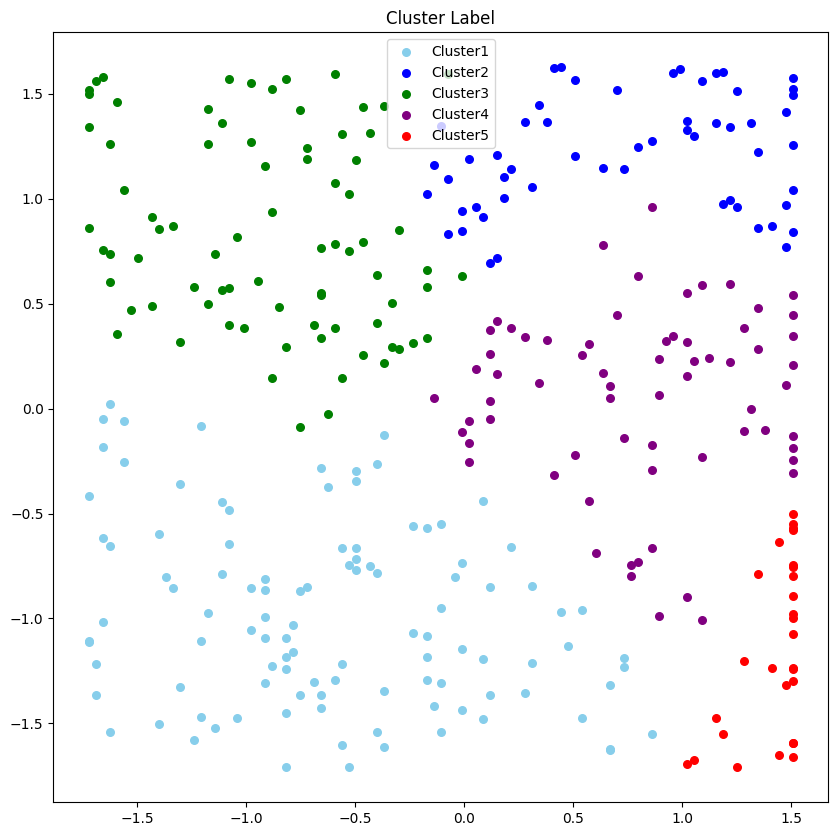

In [25]:
agglo = hirarki.fit_predict(scal)

#visualisasi cluster
plt.figure(figsize=(10,10))

#data point
plt.scatter(scal[agglo==0, 0],scal[agglo==0, 1], s=30, c='skyblue', label ='Cluster1')
plt.scatter(scal[agglo==1, 0],scal[agglo==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(scal[agglo==2, 0],scal[agglo==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(scal[agglo==3, 0],scal[agglo==3, 1], s=30, c='purple', label ='Cluster4')
plt.scatter(scal[agglo==4, 0],scal[agglo==4, 1], s=30, c='red', label ='Cluster5')

plt.title("Cluster Label")
plt.legend()
plt.show()

# DENDOGRAM

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
hirarki_linkage = linkage(scal, method='ward')

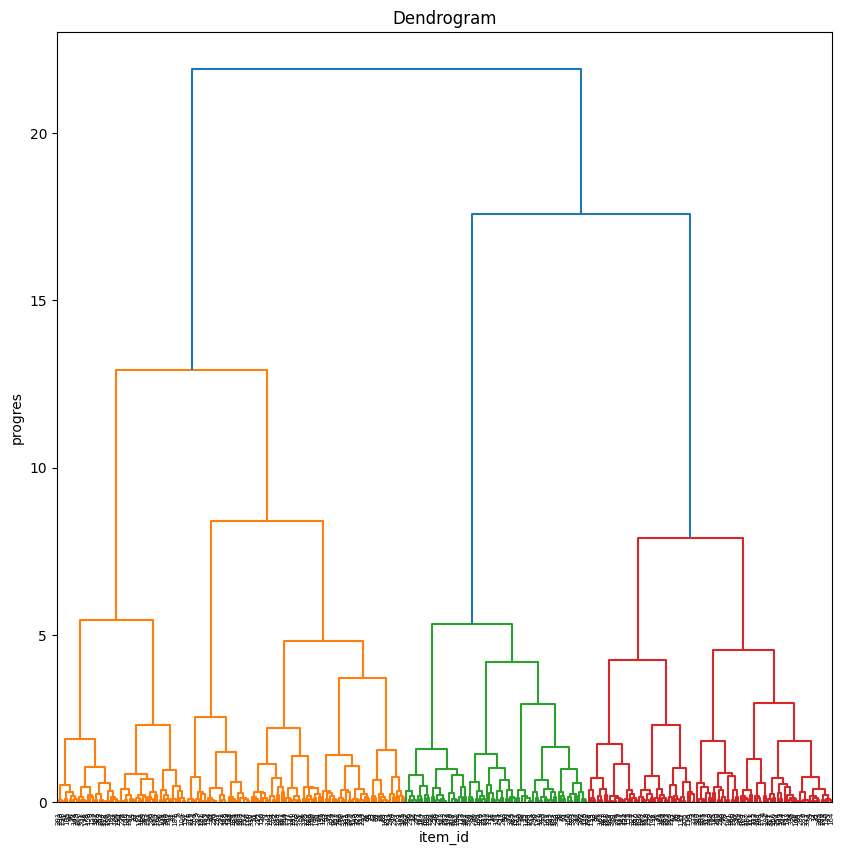

In [30]:
plt.figure(figsize=(10,10))
dendrogram(hirarki_linkage)
plt.title("Dendrogram")
plt.xlabel("item_id")
plt.ylabel("progres")
plt.show()

# K Mean Clustering

In [31]:
from sklearn.cluster import KMeans

In [32]:
points = df[['item_id', 'progress']]
points = points.values

## Jumlah Cluster dan Model

In [36]:
model_kmean = KMeans(n_clusters=5)

model_kmean.fit(points)

KMeans(n_clusters=5)

## Label Cluster

In [37]:
y = model_kmean.fit_predict(points)
print(y)

[3 0 2 1 1 1 0 1 2 2 4 2 4 3 1 2 1 2 2 4 4 2 4 4 1 3 1 3 3 3 4 1 2 2 4 1 0
 2 0 1 0 4 3 1 3 2 0 1 0 2 2 0 3 0 4 3 4 3 3 3 3 0 1 1 0 4 1 3 0 4 4 1 1 3
 4 1 0 0 0 0 4 3 0 3 0 4 4 2 2 3 2 3 0 0 0 0 2 1 0 4 4 1 2 4 2 4 2 0 2 1 1
 1 3 2 0 1 4 1 1 4 3 3 0 0 4 0 4 0 3 4 2 0 4 2 0 0 1 1 4 3 0 0 0 1 4 2 0 1
 3 1 0 2 2 2 3 3 4 4 2 3 2 3 3 4 1 2 2 3 1 3 2 1 2 2 4 0 2 4 2 0 4 2 2 0 3
 2 4 0 3 3 1 3 1 4 1 0 4 2 3 1 2 4 4 0 1 0 1 1 1 2 1 1 0 0 1 1 1 2 1 3 3 3
 3 3 1 0 3 4 4 0 4 3 0 0 0 2 1 0 4 4 0 0 4 3 2 2 2 1 4 3 3 4 0 4 1 3 1 0 0
 2 3 2 1 2 4 1 1 2 3 4 1 2 1 0 1 0 4 3 3 4 3 3 0 1 1 2 0 4 3 0 2 0 0 1 3 1
 2 3 1 3 1 2 4 0 1 0 3 4 0 4 1 3 4 0 3 4 2 1 2 0 0 0 3 4 2 2 2 4 0 0 0 0 2
 3 1 1]


## koordinat centroid

In [38]:
centroid = model_kmean.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [39]:
centroid

array([[1.75940907e+05, 5.73733333e+01],
       [3.44766056e+04, 5.12535211e+01],
       [2.98212047e+05, 5.45312500e+01],
       [9.66174531e+04, 5.33593750e+01],
       [2.37428081e+05, 4.93064516e+01]])

## Visualisasi cluster

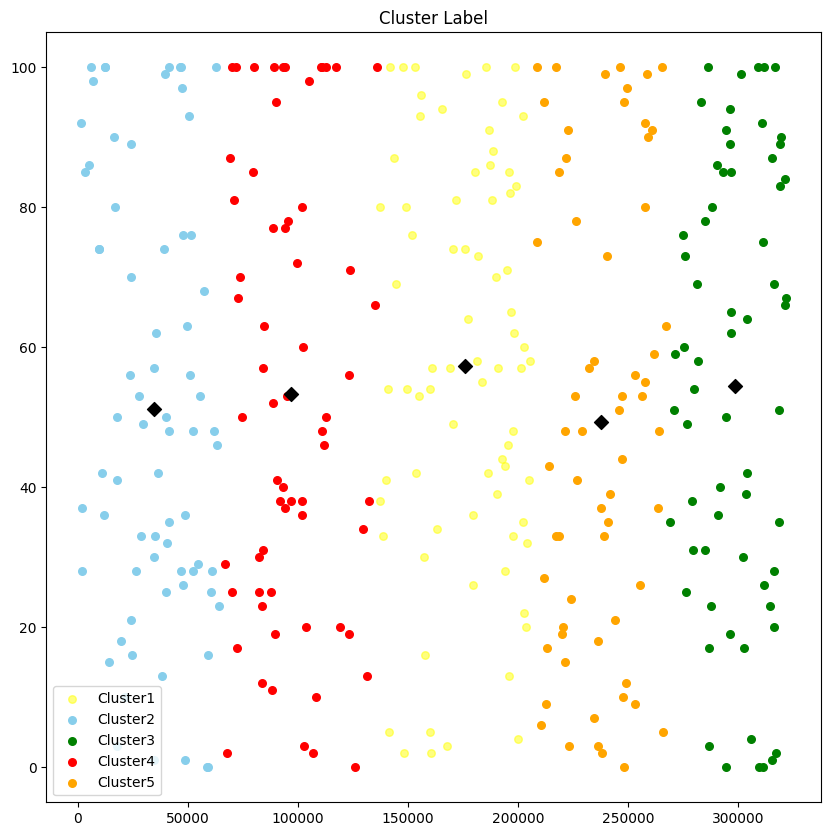

In [40]:
plt.figure(figsize=(10,10))

plt.scatter(points[y==0, 0],points[y==0, 1], s=30, c='yellow', label ='Cluster1', alpha=0.5)
plt.scatter(points[y==1, 0],points[y==1, 1], s=30, c='skyblue', label ='Cluster2')
plt.scatter(points[y==2, 0],points[y==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(points[y==3, 0],points[y==3, 1], s=30, c='red', label ='Cluster4')
plt.scatter(points[y==4, 0],points[y==4, 1], s=30, c='orange', label ='Cluster5')

plt.scatter(centroid_x, centroid_y, marker='D', s=50 ,c='black')
plt.title("Cluster Label")
plt.legend()
plt.show()

## Jumlah Cluster

In [41]:
cluster = range(1,8)
inertias = []

for n in cluster :
    model_kmean = KMeans(n_clusters=n)
    model_kmean.fit(points)
    inertias.append(model_kmean.inertia_)

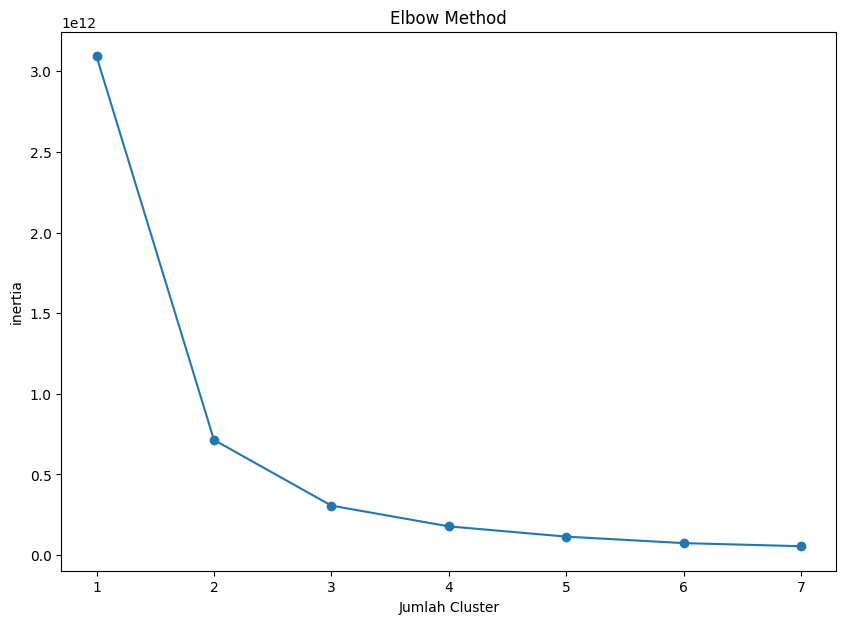

In [42]:
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()